# Teoria da Computação: Revisão Conjuntos, Relações, Funções e Linguagens
> *Autor: Davi Romero de Vasconcelos, daviromero@ufc.br, Universidade Federal do Ceará, Campus de Quixadá, Setembro de 2021*.
> *(Última atualização 05/10/2021)*

Este material foi preparado para auxiliar a disciplina de Teoria da Computação a partir de uma revisão dos conceitos de conjuntos, relações e funções, utilizando a Linguagem Pyhton. Para cada seção é apresentado um link (no título da seção) com um vídeo explicando o conteúdo a ser abordado. Uma Playlist com todo o conteúdo está disponível no [YouTube](https://youtube.com/playlist?list=PLfOnKvd6pFio3OIw3jzLTCAcJtMDs6Buj).

>Como esse é o primeiro semestre na qual o material está sendo utilizado, caso identifique algum erro ou tenha alguma sugestão, por favor, envie uma mensagem para daviromero@ufc.br.


In [ ]:
#@title Implementação em Python de Funções para Conjuntos (*beta*)
#@markdown Esta célula contém a implementação em Python das noções de conjuntos, relações, funções e linguagens que iremos utilizar nesse curso. 
#@markdown Não é necessário conhecer o código aqui implementado ou mesmo ter um conhecimento profundo da linguagem Python. Basta acompanhar os exemplos e experimentar construir seus próprios modelos.
 
#@markdown >*Execute esta célula (`ctrl+enter` ou clicando no botão ao lado) para que o ambiente seja carregado com as funções implementadas.*

# Define um novo conjunto a partir de um conjunto A obedecendo a propriedade P.
def conjunto(A,P):
  B = set()
  for a in A:
    if(P(a)):
      B.add(a)
  return B

# Para visualizar uma relação
from graphviz import Digraph
def visualiza(A1, A2, R, labelSet1="A1", labelSet2="A2"):
	g = Digraph()
	g.attr(rankdir='LR')

	with g.subgraph(name='cluster_1') as c:
		c.attr(color='blue')
		c.node_attr.update(style='filled')
		c.attr(label=labelSet1)
		for a1 in A1:
			c.node(str(a1))

	with g.subgraph(name='cluster_2') as d:
		d.attr(color='blue')
		d.attr(label=labelSet2)
		d.node_attr.update(style='filled')
		for a2 in A2:
			d.node("d_"+str(a2),label=str(a2))
	for (a1,a2) in R:
		g.edge(str(a1),"d_"+str(a2))
	return g


def visualiza_auto_relacao(A, R, labelSet=""):
	g = Digraph()
	g.attr(rankdir='LR')

	with g.subgraph(name='cluster_1') as c:
		c.attr(color='blue')
		c.node_attr.update(style='filled')
		c.attr(label=labelSet)
		for a1 in A:
			c.node(str(a1))
	for (a1,a2) in R:
		g.edge(str(a1),str(a2))
	return g

# Em python, não podemos ter um conjunto de conjuntos. Portanto, essa função retorna uma lista de listas.
def powerset(fullset):
  listsub = list(fullset)
  subsets = []
  for i in range(2**len(listsub)):
    subset = []
    for k in range(len(listsub)):            
      if i & 1<<k:
        subset.append(listsub[k])
    subsets.append(subset)   
  return subsets       
def strPowerSet(X):
  subsets= powerset(X)
  r = "{"
  for i in range(len(subsets)):
    if i== len(subsets)-1: r+=str(subsets[i])
    else: r+= str(set(subsets[i]))+", "
  return r+"}"
def printPowerSet(X):
  print(strPowerSet(X))

def unionSets(*args):
  R = set()
  for a in args:
    R = R.union(a)
  return R
def intersectionSets(*args):
  if (len(args)==0): return set()
  else:
    R = args[0]
    for i in range(1, len(args)):
      R = R.intersection(args[i])
    return R

def produtoCartesiano(A1, A2):
  R = set()
  for a1 in A1:
    for a2 in A2:
      R.add((a1,a2))
  return R

def produtoCartesiano_3(A1, A2, A3):
  R = set()
  for a1 in A1:
    for a2 in A2:
      for a3 in A3:
        R.add((a1,a2,a3))
  return R


def isConexa(A,R):
  for a in A:
    for b in A:
      if not ((a,b) in R or (b,a) in R or a==b): return False
  return True

def isReflexiva(A,R):
  for a in A:
    if (a,a) not in R: return False
  return True

def isSimetrica(A,R):
  for a in A:
    for b in A:
      if (a,b) in R:
        if (b,a) not in R: return False
  return True

def isAntiSimetrica(A,R):
  for a in A:
    for b in A:
      if (a,b) in R and (b,a) in R:
        if (a!=b): return False
  return True

def isTransitiva(A,R):
  for a in A:
    for b in A:
      for c in A:
        if (a,b) in R and (b,c) in R:
          if (a,c) not in R: return False
  return True

def isFuncao(A1,A2,R):
  for a in A1:
    elemento_unico = None
    for b in A2:
      if (a,b) in R:
        if(elemento_unico ==None): elemento_unico = b
        else: return False
  return True

def isFuncaoTotal(A1,A2,R):
  for a in A1:
    elemento_unico = None
    for b in A2:
      if (a,b) in R:
        if(elemento_unico ==None): elemento_unico = b
        else: return False
    if(elemento_unico==None): return False
  return True

def isInjetora(A1,A2,R):
  if not isFuncao(A1,A2,R): return False
  for c in A2:
    elemento_a = None
    for (a,b) in R:
      if (b==c):
        if elemento_a == None: elemento_a = a
        elif elemento_a != a: return False
  return True
  
def isSobrejetora(A1,A2,R):
  if not isFuncao(A1,A2,R): return False
  for b in A2:
    result = False
    for a in A1:
      if (a,b) in R: 
        result = True
        break
    if not result: return False
  return True

def isBijetora(A1,A2,R):
  return isInjetora(A1,A2,R) and isSobrejetora(A1,A2,R)

def fechoTransitivo(A,R):
  S = R.copy()
  adicionou_elemento = True
  while adicionou_elemento:
    adicionou_elemento = False
    for a in A:
      for b in A:
        for c in A:
          if (a,b) in S and (b,c) in S:
            if (a,c) not in S: 
              S.add((a,c))
              adicionou_elemento = True
  return S

def fechoReflexivo(A,R):
  S = R.copy()
  for a in A:
    if (a,a) not in S: S.add((a,a))
  return S

sVazia = ''

# Retorna a o Sigma^k do alfabeto A
def sigma(A,k):
  R = set()
  if k==0: return {sVazia}
  else:
    S = sigma(A,k-1)
    for s in S:
      for a in A:
        R.add(s+str(a))
  return R

# Converte uma string em um número
def T(s):
  s = '1'+s
  z = len(s)
  r = 0
  for x in range (z):
    y = z-x-1
    r+= (2**y)*int(s[x])
  return r


import pandas as pd
# Visualiza a diagonalização de uma auto-relação. Note que D é diferente de todo R
def visualiza_diagonalizacao(A, R):
  l = []
  d ={}
  D = []
  D_s = ''
  A = sorted(list(A))
  for a in A:
    la = []
    R_s = ''
    for b in A:
      if (a,b) in R:
        la.append('x')
        if R_s == '': R_s = str(b)
        else: R_s += ', '+str(b)      
        if a==b: 
          D.append(' ') 
      else:
        if a==b: 
          D.append('x') 
          D_s = str(b) if D_s=='' else D_s+', '+str(b)
        la.append(' ')  
        
    la.append('R_'+str(a)+'={'+R_s+'}')
    d[a] = la
    l.append(la)
  D.append('D={'+D_s+'}')
  if 'D' in A: d['D'] = D  
  else: d[' D'] = D

  df = pd.DataFrame.from_dict(d, orient='index',columns=list(A)+['R'])
  display(df)



# [Conjuntos](https://youtu.be/w7u0zyJU29Q)

- Um **Conjunto** $L$ é uma coleção de objetos (elementos), na qual não distinguimos a ordem dos elementos e nem ocorrências múltiplas de elementos. Se $b$ é um elemento de $L$, denotamos $b\in L$. Caso não pertença, escrevemos $b\not\in L$.
\begin{equation*}L=\{a,b,c,d\}=\{b,c,a,d\}=\{a,a,b,c,d,b\}\end{equation*}
- Um conjunto sem elementos é dito **vazio** ($\emptyset$). Qualquer outro conjunto é dito \textbf{não-vazio}.
- Alguns conjuntos são **infinitos**:  
  - $\mathbb{N}=\{0,1,2,\ldots\}$ 
  - $\mathbb{Z}=\{\ldots,-2,-1,0,1,2,\ldots\}$


In [ ]:
L1 = {'a','b','c','d'}
L2 = {'b','c','a','d'}
L3 = {'a','a','b','c','d','b'}
print(L1)
print(L2)
print(L3)
print(L1==L2)
print(L1==L3)
print(L2==L3)


{'c', 'b', 'a', 'd'}
{'c', 'a', 'b', 'd'}
{'c', 'b', 'a', 'd'}
True
True
True


## Definindo Conjuntos 
Seja $A$ um conjunto definido e $P$ uma propriedade sobre $A$, definimos um conjunto $B$ por
\begin{equation*}B=\{x:x\in A\text{ e }x\text{ tem a propriedade }P\}\end{equation*}
- Seja $A=\{2,3,5,6\}$ e $P$ a propriedade de ser maior que $2$. 
  \begin{equation*}B=\{x:x\in A\text{ e }x\text{ é maior que 2}\}=\{3,5,6\}\end{equation*}
- O Conjunto dos números ímpares, pode ser definido como
  \begin{equation*}B=\{x:x\in \mathbb{N}\text{ e }x\text{ não é divisível por 2}\}=\{1,3,5,\ldots\}\end{equation*}

In [ ]:
maior2 = lambda x: x>2

B = conjunto({2,3,5,6},maior2)
B

{3, 5, 6}

In [ ]:
naoDivisivel2 = lambda x: x%2 != 0
B = conjunto({0,1,2,3,4,5,6,7},naoDivisivel2)
B

{1, 3, 5, 7}

In [ ]:
# Exercício: defina um conjunto cujos os elementos são maiores do que 2 e menores do que 8 a partir do conjunto {1,3,5,7,9}. Utilize a função conjunto(A,P) e uma função lambda para definir a propriedade P 


## Subconjunto
Um conjunto $A$ é um **subconjunto** de $B$, se cada elemento de $A$ está em $B$ e escrevemos denotado por $A\subseteq B$. Note que qualquer conjunto é subconjunto de si próprio e que o conjunto vazio é subconjunto de todos os conjuntos ($\emptyset\subseteq A$). 
- Se $A$ é um subconjunto de $B$, mas $A$ é diferente de $B$, dizemos que $A$ é um **subconjunto próprio** de $B$ e escrevemos $A\subset B$.
- A coleção de todos os subconjuntos de um conjunto $A$ é um conjunto denominado de **conjunto-potência**, representado por $2^{A}$.
- Dizemos que dois conjuntos $A$ e $B$ são **iguais** sse todos os elementos de $A$ são elementos de $B$ e vice-versa. Para demonstrar que $A=B$, devemos mostrar que $A \subseteq B$ e $B\subseteq A$.


In [ ]:
A = {1,2,3,4}
B = {1,5}
C = {1,3,4}
D = {5,1}

print(f"O conjunto vazio é: {set()}")
print(f"{A} é um subconjunto de {A}: {A.issubset(A)}")
print(f"{B} é um subconjunto de {A}: {B.issubset(A)}")
print(f"{C} é um subconjunto de {A}: {C.issubset(A)}")

print(f"{A} é um subconjunto próprio de {A}: {A.issubset(A) and A != A}")
print(f"{B} é um subconjunto próprio de {A}: {B.issubset(A) and A != B}")
print(f"{C} é um subconjunto próprio de {A}: {C.issubset(A) and A !=C}")

print(f"O conjunto-potência de {B} é: {strPowerSet(B)}")
print(f"O conjunto-potência de {C} é: {strPowerSet(C)}")

print(f"{B} é igual a {D}: {B.issubset(D) and D.issubset(B)}")
print(f"{A} é igual a {C}: {C.issubset(A) and A.issubset(C)}")

O conjunto vazio é: set()
{1, 2, 3, 4} é um subconjunto de {1, 2, 3, 4}: True
{1, 5} é um subconjunto de {1, 2, 3, 4}: False
{1, 3, 4} é um subconjunto de {1, 2, 3, 4}: True
{1, 2, 3, 4} é um subconjunto próprio de {1, 2, 3, 4}: False
{1, 5} é um subconjunto próprio de {1, 2, 3, 4}: False
{1, 3, 4} é um subconjunto próprio de {1, 2, 3, 4}: True
O conjunto-potência de {1, 5} é: {set(), {1}, {5}, [1, 5]}
O conjunto-potência de {1, 3, 4} é: {set(), {1}, {3}, {1, 3}, {4}, {1, 4}, {3, 4}, [1, 3, 4]}
{1, 5} é igual a {1, 5}: True
{1, 2, 3, 4} é igual a {1, 3, 4}: False


In [ ]:
# Exercício: Verifique se o conjunto {a,d,e} é um subconjunto de {a,b,c,d}

In [ ]:
# Exercício: Calcule o conjunto-potência de {a,b,c,d}

## [Operações Sobre Conjuntos](https://youtu.be/v1TCoHprRe4)
Sejam $A$ e $B$ dois conjuntos, podemos definir operações de conjunto:
- **União:** $A\cup B=\{x: x\in A\text{ ou }x\in B\}$
- **Interseção:** $A\cap B=\{x: x\in A\text{ e }x\in B\}$
- **Diferença:** $A- B=\{x: x\in A\text{ e  }x\notin B\}$
Sejam $A=\{1,2,3,5\}$ e $B=\{2,3,4\}$, temos
- $A\cup B=\{1,2,3,4,5\}$
- $A\cap B=\{2,3\}$
- $A- B=\{1,5\}$ e $B-A=\{4\}$

Seja $S=\{A_1,\ldots,A_n\}$ um conjunto de conjuntos de $A_1,\ldots,A_n$, podemos definir operações de conjunto:
\begin{equation*}\textbf{União:} \bigcup_{A\in S} A=A_1\cup\ldots\cup A_n\end{equation*}
\begin{equation*}\textbf{Interseção:}\bigcap_{A\in S} A=A_1\cap\ldots\cap A_n\end{equation*}

 Seja $S=\{\{1,2,3,5\},\{2,3,4\} ,\{2,5,6\}\}$, temos

\begin{equation*}\bigcup_{A\in S} A=\{1,2,3,5\}\cup\{2,3,4\} \cup\{2,5,6\}=\{1,2,3,4,5,6\}\end{equation*}
\begin{equation*}\bigcap_{A\in S} A=\{1,2,3,5\}\cap\{2,3,4\} \cap\{2,5,6\}=\{2\}\end{equation*}

In [ ]:
A={1,2,3,5}
B={2,3,4}
C = {2,5,6}
print(f"{A} união {B} é: {A.union(B)}")
print(f"{A} inteserção {B} é: {A.intersection(B)}")
print(f"A diferença entre {A} e {B} é: {A.difference(B)}")
print(f"A diferença entre {B} e {A} é: {B.difference(A)}")
print(f"A união de {A}, {B} e {C} é: {unionSets(A,B,C)}")
print(f"A interseção de {A}, {B} e {C} é: {intersectionSets(A,B,C)}")

{1, 2, 3, 5} união {2, 3, 4} é: {1, 2, 3, 4, 5}
{1, 2, 3, 5} inteserção {2, 3, 4} é: {2, 3}
A diferença entre {1, 2, 3, 5} e {2, 3, 4} é: {1, 5}
A diferença entre {2, 3, 4} e {1, 2, 3, 5} é: {4}
A união de {1, 2, 3, 5}, {2, 3, 4} e {2, 5, 6} é: {1, 2, 3, 4, 5, 6}
A interseção de {1, 2, 3, 5}, {2, 3, 4} e {2, 5, 6} é: {2}


In [ ]:
# Exercício: A partir de A= {a,b,c,d} e B={c,d,f,g}, calcule a união, interseção e diferença de A e B. 

## [Propriedade sobre Conjuntos](https://youtu.be/THikxTzmGq0)
Sejam $A, B$ e $C$ conjuntos, as seguintes leis se aplicam:
- Idempotência:  $A\cup A=A$ e $A\cap A=A$  
- Comutatividade: $A\cup B= B\cup A$ e $A\cap B= B\cap A$
- Associatividade: $(A\cup B)\cup C= A\cup (B\cup C)$ e $(A\cap B)\cap C= A\cap (B\cap C)$ 
- Distributividade: $(A\cup B)\cap C= (A\cap C)\cup (B\cap C)$ e $(A\cap B)\cup C= (A\cup C)\cap (B\cup C)$
- Absorção: $(A\cup B)\cap A=A$ e $(A\cap B)\cup A=A$
- Leis de Morgan: $A-(B\cup C)=(A-B)\cap(A-C)$ e $A-(B\cap C)=(A-B)\cup(A-C)$


Prova de Igualdade de Conjuntos
-Distributividade:  $(A\cup B)\cap C= (A\cap C)\cup (B\cap C)$
>**Demonstração**: \begin{align*}
          x\in (A\cup B)\cap C &
         \Longleftrightarrow  x\in  (A\cup B)\text{ e } x\in C \\
         &\Longleftrightarrow  (x\in A\text{ ou }x\in B)\text{ e } x\in C \\
         &\Longleftrightarrow  (x\in A\text{ e }x\in C)\text{ ou } (x\in B\text{ e }x\in C)\\ 
         &\Longleftrightarrow  (x\in A\cap C)\text{ ou } (x\in B \cap C)\\ 
         &\Longleftrightarrow  x\in (A\cap C)\cup (B \cap C)\\ 
        \end{align*}

## [Produto Cartesiano](https://youtu.be/O_1N7iZw8ic)
Produto Cartesiano} dos conjuntos $A_1,\ldots, A_n$, denotado por $A_1\times\ldots\times A_n$, é o conjunto das tuplas ordenadas $\langle a_1,\ldots,a_n\rangle$, com $a_i\in A_i$ para todo $i=1,\ldots,n$. 

Exemplo: $A_1=\{a,b,c\}$, $A_2=\{1,2\}$, temos que 
- $A_1\times A_2=\{\langle a,1\rangle, \langle a,2\rangle, \langle b,1\rangle, \langle b,2\rangle, \langle c,1\rangle, \langle c,2\rangle\}$


In [ ]:
A1 = {'a','b','c'}
A2 = {1,2}
print(f"{A1} x {A2} = {produtoCartesiano(A1,A2)}")

{'c', 'b', 'a'} x {1, 2} = {('b', 1), ('b', 2), ('c', 2), ('c', 1), ('a', 1), ('a', 2)}


In [ ]:
#Exercício: Calcule o produto cartesiano dos conjuntos A={a,b} e B = {1,2,3}
A = {'a','b'}
B = {1,2,3}
X = {}# Defina o conjunto X
print(f"O produto cartesiano de {A} com {B} é {X}: {X==produtoCartesiano(A,B)}")

O produto cartesiano de {'b', 'a'} com {1, 2, 3} é {}: False


In [ ]:
#Exercício: Calcule o produto cartesiano dos conjuntos A={a,b,c}, B = {1,2} e C ={f,g}
A ={'a','b','c'}
B = {1,2}
C ={'f','g'}
X = set() # Defina o conjunto X
print(f"O produto cartesiadno de {A} x {B} x {C} = {X}: \n {X==produtoCartesiano_3(A,B,C)}")

O produto cartesiadno de {'c', 'b', 'a'} x {1, 2} x {'f', 'g'} = set(): 
 False


# [Relação](https://youtu.be/pEjUuxGBfDo)
Uma **Relação $R_n$ de aridade $n$** sobre os conjuntos $A_1,\ldots,A_n$  é um conjunto de tuplas ordenados $\langle a_1\ldots,a_n\rangle$ tais que $a_i\in A_i$ para todo $i=1,\ldots,n$, i.e., $R_n\subseteq A_1\times\ldots\times A_n$. 

Exemplo: $A_1=\{a,b,c\}$, $A_2=\{1,2,3,4\}$ e $R_2=\{\langle a,1\rangle, \langle a,2\rangle, \langle c,3\rangle\}$

As relações de aridade $1,2,3$ são denominadas unárias, binárias e ternárias. 


{('a', 1), ('c', 3), ('a', 2)} é uma relação, i.e., é um subconjunto de {'c', 'b', 'a'} x {1, 2, 3, 4}: True 


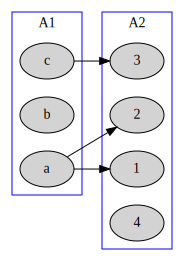

In [ ]:
A1 ={'a','b','c'}
A2 ={1,2,3,4}
R2 ={('a',1),('a',2),('c',3)}
print(f"{R2} é uma relação, i.e., é um subconjunto de {A1} x {A2}: {R2.issubset(produtoCartesiano(A1,A2))} " )
visualiza(A1, A2, R2)


In [ ]:
R3 ={('d',1),('a',2),('c',3)}
print(f"{R3} é uma relação, i.e., é um subconjunto de {A1} x {A2}: {R3.issubset(produtoCartesiano(A1,A2))} " )

{('c', 3), ('a', 2), ('d', 1)} é uma relação, i.e., é um subconjunto de {'c', 'b', 'a'} x {1, 2, 3, 4}: False 


## Auto-Relação
Uma relação $R: A\times A$ é dita ser uma **auto-relação**.
Seja $R$ uma auto-relação, definimos $R$ como:
- **Conexa**, se, para todo $a,b\in A$, vale que $\langle a,b\rangle\in R$ ou $\langle b,a\rangle\in R$ ou $a=b$.
- **Reflexiva**, se, para todo $a\in A$, vale que $\langle a,a\rangle\in R$.
-**Simétrica**, se, para todo $a,b\in A$, vale que caso $\langle a,b\rangle\in R$, então $\langle b,a\rangle\in R$.
- **Anti-Simétrica**, se, para todo $a,b\in A$, caso $\langle a,b\rangle\in R$ e $\langle b,a\rangle\in R$ então $a=b$.
- **Transitiva**, se, para todo $a,b,c\in A$, caso $\langle a,b\rangle\in R$ e $\langle b,c\rangle\in R$ então $\langle a,c\rangle\in R$.

A auto-relação $\leq:\mathbb{N}\times \mathbb{N}$ é conexa, reflexiva, anti-simétrica e transitiva.


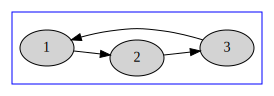

In [ ]:
A = {1,2,3}
R1 ={(1,2),(3,1),(2,3)}
visualiza_auto_relacao(A,R1)

{(3, 3), (1, 1), (2, 2)} é uma relação reflexiva: True


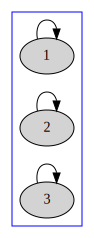

In [ ]:
R2 = {(1,1),(2,2),(3,3)}
print(f"{R2} é uma relação reflexiva: {isReflexiva(A,R2)}")
visualiza_auto_relacao(A,R2)

{(1, 2), (3, 2), (2, 1), (2, 3), (2, 2)} é uma relação simétrica: True


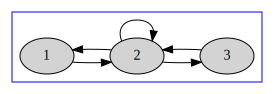

In [ ]:
R3 ={(1,2),(2,1),(2,3),(3,2),(2,2)}
print(f"{R3} é uma relação simétrica: {isSimetrica(A,R3)}")
visualiza_auto_relacao(A,R3)

{(1, 2), (2, 3), (2, 2)} é uma relação Anti-Simétrica: True


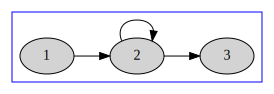

In [ ]:
R4 ={(1,2),(2,3),(2,2)}
print(f"{R4} é uma relação Anti-Simétrica: {isAntiSimetrica(A,R4)}")
visualiza_auto_relacao(A,R4)

{(1, 2), (1, 3), (2, 3)} é uma relação Transitiva: True


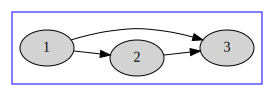

In [ ]:
R5 ={(1,2),(2,3),(1,3)}
print(f"{R5} é uma relação Transitiva: {isTransitiva(A,R5)}")
visualiza_auto_relacao(A,R5)

## [Fecho de uma Relação](https://youtu.be/lY_48U4NVH8)
Sejam $R: A\times A$ uma auto-relação e $P$ um conjunto de propriedades. Definimos o **Fecho de $R$ em Relação a $P$** como o menor conjunto que contém $R$ e que satisfaz as propriedade de $P$ e é denotado por $FECHO-P(R)$. 
Note que $R\subseteq FECHO-P(R)$.
- Definimos o **Fecho Transitivo**, denotado por $R^+$, como o menor conjunto que satisfaz:
  - $R\subseteq R^+$.
  - Se $\langle a,b\rangle\in R^+$ e $\langle b,c\rangle\in R^+$, então $\langle a,c\rangle\in R^+$
- Definimos o **Fecho Transitivo e Reflexivo**, denotado por $R^*$, como $R^*=R^+\cup \{\langle a,a\rangle| a\in A\}$.
  
  Se $R=\{\langle 1,2\rangle, \langle 2,3\rangle, \langle 3,4\rangle, \langle 1,5\rangle\}$, então o Fecho Transitivo e Reflexivo é $R^*=\{\langle 1,1\rangle, \langle 1,2\rangle, \langle 1,3\rangle, \langle 1,4\rangle, \langle 1,5\rangle,  \langle 2,2\rangle, \langle 2,3\rangle, \langle 2,4\rangle,$ $\langle 3,3\rangle, \langle 3,4\rangle, \langle 4,4\rangle, \langle 5,5\rangle\}$

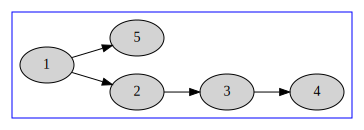

In [ ]:
A = {1,2,3,4,5}
R = {(1,2),(2,3),(3,4),(1,5)}
visualiza_auto_relacao(A,R)

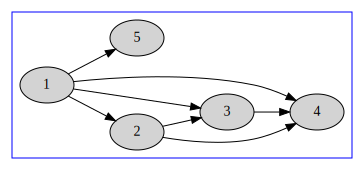

In [ ]:
A = {1,2,3,4,5}
R = {(1,2),(2,3),(3,4),(1,5)}
R = fechoTransitivo(A,R)
visualiza_auto_relacao(A,R)

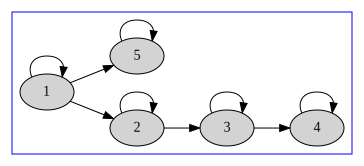

In [ ]:
A = {1,2,3,4,5}
R = {(1,2),(2,3),(3,4),(1,5)}
R = fechoReflexivo(A,R)
visualiza_auto_relacao(A,R)

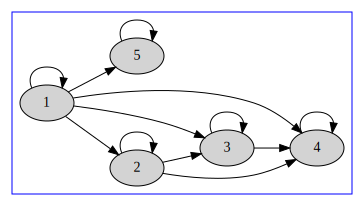

In [ ]:
A = {1,2,3,4,5}
R = {(1,2),(2,3),(3,4),(1,5)}
R = fechoReflexivo(A,fechoTransitivo(A,R))
visualiza_auto_relacao(A,R)

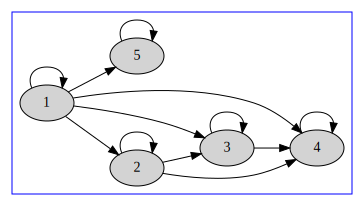

In [ ]:
FECHO_R = {(1,1),(1,2),(1,3),(1,4),(1,5),(2,2),(2,3),(2,4),(3,3),(3,4),(4,4),(5,5)}
visualiza_auto_relacao(A,FECHO_R)

# [Função](https://youtu.be/YQTqwe1RBM4)
Uma **Função de aridade $n$ $f_n:A_1\times\ldots\times A_n\rightarrow B$** é um mapeamento de $\langle a_1\ldots,a_n\rangle$ em **um único elemento** de $b\in B$. 

Dizemos que $a_1,\ldots,a_n$ são os argumentos da função $f_n$ e 
$f_n(a_1,\ldots,a_n)=b$ denota o valor de $b\in B$ do mapeamento da função $f_n$ com os argumentos $a_1,\ldots,a_n$.

Exemplo: $A_1=\{a,b,c\}$, $B=\{1,2,3,4\}$ e $f_1:A_1\rightarrow B$ $f_1(a)=1,~ f_1(b)=1,~f_1(c)=3$.



{('a', 1), ('c', 3), ('b', 1)} é uma função de {'c', 'b', 'a'} para {1, 2, 3, 4}: True
{('a', 1), ('c', 3), ('b', 1)} é uma função de {'c', 'b', 'a'} para {1, 2, 3, 4}: True


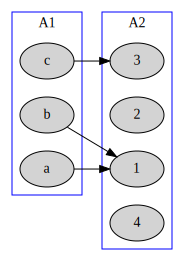

In [ ]:
A1 ={'a','b','c'}
A2={1,2,3,4}
R = {('a',1),('b',1),('c',3)}
print(f"{R} é uma função de {A1} para {A2}: {isFuncao(A1,A2,R)}")
print(f"{R} é uma função de {A1} para {A2}: {isFuncaoTotal(A1,A2,R)}")
visualiza(A1,A2,R)

{('a', 1), ('b', 2)} é uma função de {'c', 'b', 'a'} para {1, 2, 3, 4}: True
{('a', 1), ('b', 2)} é uma função total de {'c', 'b', 'a'} para {1, 2, 3, 4}: False


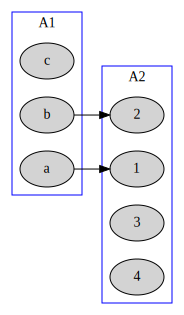

In [ ]:
A1 ={'a','b','c'}
A2={1,2,3,4}
R = {('a',1),('b',2)}
print(f"{R} é uma função de {A1} para {A2}: {isFuncao(A1,A2,R)}")
print(f"{R} é uma função total de {A1} para {A2}: {isFuncaoTotal(A1,A2,R)}")
visualiza(A1,A2,R)

{('a', 1), ('c', 3), ('a', 2)} é uma função de {'c', 'b', 'a'} para {1, 2, 3, 4}: False
{('a', 1), ('c', 3), ('a', 2)} é uma função total de {'c', 'b', 'a'} para {1, 2, 3, 4}: False


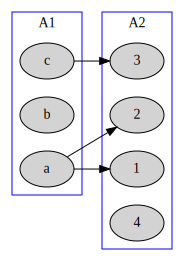

In [ ]:
A1 ={'a','b','c'}
A2={1,2,3,4}
R ={('a',1),('a',2),('c',3)}
print(f"{R} é uma função de {A1} para {A2}: {isFuncao(A1,A2,R)}")
print(f"{R} é uma função total de {A1} para {A2}: {isFuncaoTotal(A1,A2,R)}")
visualiza(A1,A2,R)

## [Função Injetora, Sobrejetora e Bijetora](https://youtu.be/jZDLWe1XVN4)
- Dizemos que **Função $f$ é injetora** quando $\forall a,b,c\in A$ se $f(a)=c$ e $f(b)=c$ então $a=b$.
  Exemplo: $A=\{a,b\}, B=\{1,2,3\}$ e $f(a)=1, f(b)=2$.
- Dizemos que **Função $f$ é sobrejetora** quando $\forall b\in B$ temos que existe um $a\in A$ tal que $f(a)=b$.
  Exemplo: $A=\{a,b,c\}, B=\{1,2\}$ e $f(a)=1, f(b)=1, f(c)=2$.
- Dizemos que uma **Função $f$ é bijetora (ou uma bijeção)** quando ela é injetora e sobrejetora.
   Exemplo: $A=\{a,b\}, B=\{1,2\}$ e $f(a)=2, f(b)=1$.
   
   Podemos ter bijeções sobre conjuntos infinitos.
Exemplo: $f:\mathbb{N}\rightarrow\mathbb{N}$ e $\forall x\in\mathbb{N}$ $f(x)=2x$.

A função de {'b', 'a'} para {1, 2, 3} é injetora: True


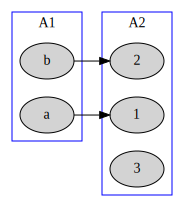

In [ ]:
A ={'a','b'}
B = {1,2,3}
R = {('a',1),('b',2)}

print(f"A função de {A} para {B} é injetora: {isInjetora(A,B,R)}")
visualiza(A,B,R)

A função de {'c', 'b', 'a'} para {1, 2} é sobrejetora: True


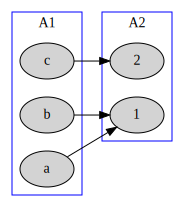

In [ ]:
A ={'a','b','c'}
B = {1,2}
R = {('a',1),('b',1),('c',2)}

print(f"A função de {A} para {B} é sobrejetora: {isSobrejetora(A,B,R)}")
visualiza(A,B,R)

O mapeamento de {'c', 'b', 'a', 'd'} para {1, 2, 3, 4} é uma função: True
O mapeamento de {'c', 'b', 'a', 'd'} para {1, 2, 3, 4} é uma função total: True
A função de {'c', 'b', 'a', 'd'} para {1, 2, 3, 4} é injetora: False
A função de {'c', 'b', 'a', 'd'} para {1, 2, 3, 4} é sobrejetora: False


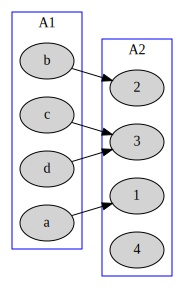

In [ ]:
A ={'a','b','c','d'}
B = {1,2,3,4}
R = {('a',1),('b',2),('c',3),('d',3)}

print(f"O mapeamento de {A} para {B} é uma função: {isFuncao(A,B,R)}")
print(f"O mapeamento de {A} para {B} é uma função total: {isFuncaoTotal(A,B,R)}")
print(f"A função de {A} para {B} é injetora: {isInjetora(A,B,R)}")
print(f"A função de {A} para {B} é sobrejetora: {isSobrejetora(A,B,R)}")
visualiza(A,B,R)

A função {('b', 1), ('a', 2)} de {'b', 'a'} para {1, 2} é bijetora: True


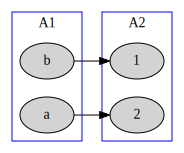

In [ ]:
A = {'a','b'}
B = {1,2}
R = {('a',2),('b',1)}
print(f"A função {R} de {A} para {B} é bijetora: {isBijetora(A,B,R)}")
visualiza(A,B,R)

A função {(1, 2), (0, 0), (5, 10), (4, 8), (3, 6), (6, 12), (2, 4)} de {0, 1, 2, 3, 4, 5, 6} para {0, 2, 4, 6, 8, 10, 12} é bijetora: True


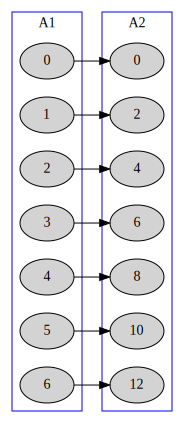

In [ ]:
A = {0,1,2,3,4,5,6}
B = {0,2,4,6,8,10,12}
R = {(0,0),(1,2),(2,4),(3,6),(4,8),(5,10),(6,12)}
print(f"A função {R} de {A} para {B} é bijetora: {isBijetora(A,B,R)}")
visualiza(A,B,R)

# [Conjunto Finito vs. Infinito](https://youtu.be/yAmvhaIN7D4)

- Um **Conjunto Finito** tem um número inteiro que conta o número de elementos de um conjunto. Ex. $\{a,b,c\}$ é finito e tem cardinalidade 3. Note que é impossível encontrar uma bijeção entre um conjunto finito e um subconjunto próprio.
- Formalmente, um **Conjunto Infinito** é um conjunto para o qual existe uma bijeção entre ele e um subconjunto próprio. 
  Exemplo, o conjunto dos inteiros $\mathbb{N}$ é infinito, pois existe um subconjunto próprio (os inteiros pares) tal que existe uma bijeção entre eles ($f(x)=2x$).
- Um **Conjunto é Contável (ou Enumerável)** se existe uma bijeção com o Naturais.


    
- A União de um conjunto finito de conjuntos enumeráveis é um conjunto enumerável.
  Exemplo: Sejam $A, B$ e $C$ conjuntos enumeráveis, então $A\cup B\cup C$ é enumerável
  - $A=\{a_0,a_1,a_2,\ldots\}$, $B=\{b_0,b_1,b_2,\ldots\}$,  $C=\{c_0,c_1,c_2,\ldots\}$
  - $A\cup B\cup C=$ \{$\underbrace{a_0}_0,\underbrace{b_0}_1,\underbrace{c_0}_2, \underbrace{a_1}_3,\underbrace{b_1}_4,\underbrace{c_1}_5,\ldots\}$
    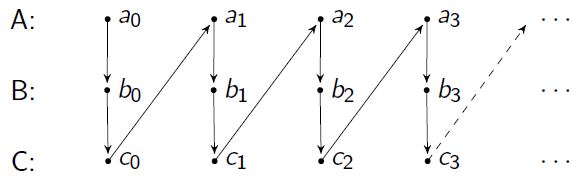

- O Produto Cartesiano de um conjunto finito de conjuntos enumeráveis é enumerável.
Exemplo: O conjunto $\mathbb{N}\times\mathbb{N}$ é enumerável com $f(i,j)=((i+j)^2+3i+j)/2$

  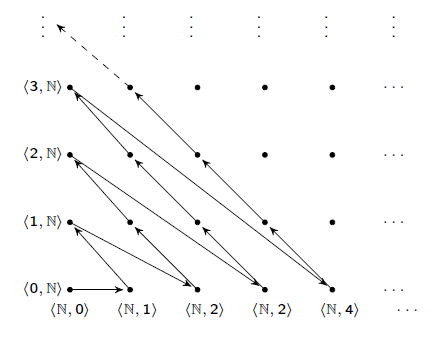


# [Provas por Indução sobre os naturais](https://youtu.be/S9rabtYh3Rs)
Seja $A$ uma propriedade sobre os naturais, então A(n) para todo inteiro $n\geq 0$ se
            \begin{equation*}\left\{
            \begin{array}[c]{l}
                    A(0)
               \\   \forall k\left(A(k)\Rightarrow A(k+1)\right)
            \end{array}\right.
            \end{equation*}

Para todo $n\geq 0$, temos que
           \begin{equation*}
                2^0 + 2^1 + 2^2 + \ldots + 2^n = 2^{n+1} -1
           \end{equation*}

>Demonstração:
- Caso Básico ($n=0$):
    \begin{eqnarray*}
                     2^0  & = & 2^{0+1} -1 \\
                     1  & = & 2^{1} -1  = 1
    \end{eqnarray*}
- Passo Indutivo ($n=k+1$): 
> 
>  Queremos demonstrar:
\begin{equation*}
                    2^0 + 2^1 + 2^2 + \ldots + 2^{k+1} = 2^{k+1+1} -1
\end{equation*}
    Hipótese de Indução (HI):
  \begin{equation*}
                    2^0 + 2^1 + 2^2 + \ldots + 2^k = 2^{k+1} -1
  \end{equation*}
  Daí, temos que:
  \begin{eqnarray*}
                      2^0 + 2^1 + 2^2 + \ldots + 2^{k} + 2^{k+1}&    & \\
                      & = & 2^{k+1} -1 + 2^{k+1}, \textrm{ por HI}  \\
                     & = &  2(2^{k+1}) -1 \\
                     & = &  2^{k+1+1} -1
 \end{eqnarray*}
 

# [Princípio da Diagonalização](https://youtu.be/NVPZalpSFpE)
Seja $R$ uma relação binária em um conjunto $A$ e, para cada $a\in A$, seja $R_a=\{b:b\in A\text{ e }\langle a,b\rangle\in R\}$. Defina o **Conjunto Diagonal** $D=\{a:a\in A\text{ e }\langle a,a\rangle\notin R\}$. Daí, $D$ será distinto de cada $R_a$.

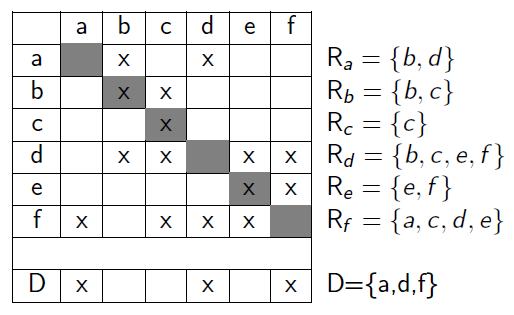

### O Conjunto $2^\mathbb{N}$ é incontável
> **Demonstração** Suponha que $2^\mathbb{N}$ seja contável, ou seja, existe alguma forma de enumerar todos os membros de $2^\mathbb{N}=\{R_0,R_1,R_2\ldots\}$. Note que os elementos $R_0,R_1,R_2\ldots$ correspondem aos conjuntos $R_a$ do enunciado do princípio da diagonalização, para a relação $R=\{\langle i,j\rangle:j\in R_i\}$. Agora, considere o conjunto $D=\{n:n\in\mathbb{N}\text{ e } n\notin R_n\}$. Assim, $D$ é distinto de todos $R_a,\forall a\in\mathbb{N}$. Portanto, $2^\mathbb{N}$ é incontável.
>
> 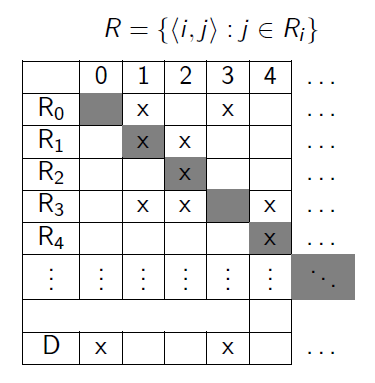


In [ ]:
A = {'a','b','c','d','e','f'}
R = {('a','b'), ('a','d'), ('b','b'), ('b','c'),('c','c'),('d','b'),('d','c'),('d','e'),('d','f'),('e','e'),('e','f'), ('f','a'),('f','c'),('f','d'),('f','e')}
visualiza_diagonalizacao(A,R)

,a,b,c,d,e,f,R
a,,x,,x,,,"R_a={b, d}"
b,,x,x,,,,"R_b={b, c}"
c,,,x,,,,R_c={c}
d,,x,x,,x,x,"R_d={b, c, e, f}"
e,,,,,x,x,"R_e={e, f}"
f,x,,x,x,x,,"R_f={a, c, d, e}"
D,x,,,x,,x,"D={a, d, f}"


In [ ]:
A = {1,2,3,4,5}
R = {(1,1),(1,2),(2,3),(3,4),(1,5)}
visualiza_diagonalizacao(A,R)

,1,2,3,4,5,R
1,x,x,,,x,"R_1={1, 2, 5}"
2,,,x,,,R_2={3}
3,,,,x,,R_3={4}
4,,,,,,R_4={}
5,,,,,,R_5={}
D,,x,x,x,x,"D={2, 3, 4, 5}"


# [Alfabeto, Strings e Potências de um Alfabeto](https://youtu.be/dj-e2LISS5M)
- Um **Alfabeto** $\Sigma$ é um conjunto de símbolos finitos e não-vazio.

  - $\Sigma=\{0,1\}$ o alfabeto binário.
  - $\Sigma=\{a,b,\ldots,z\}$ o conjunto das letras minúsculas

- Uma **String (ou palavra)** $w$ é uma sequência finita de símbolos de um alfabeto. Por exemplo, $011$ e $1110$ são strings do alfabeto $\Sigma=\{0,1\}$.
- O **String Vazio** é o string com zero ocorrências de símbolos, denotada por $\epsilon$. Denotamos $\Sigma_\epsilon =\Sigma\cup\{\epsilon\}$.
- O **Comprimento (ou Tamanho)** $|w|$ é o número de posições para símbolos no string. Por exemplo, $\epsilon$, $011$ e $1110$ tem comprimento 0, 3 e 4, respectivamente.

- Definimos $\Sigma^k$ como o conjunto de strings de comprimento $k$. 
  - $\Sigma^0=\{\epsilon\}$ para todo alfabeto $\Sigma$.
  - Se $\Sigma=\{0,1\}$, então $\Sigma^1=\{0,1\}$, $\Sigma^2=\{00,01,10,11\}$, $\Sigma^3=\{000,001,010,100,101,110,111\}$ e assim por diante.
- O conjunto de todos os strings sobre um alfabeto $\Sigma$ é denotado por $\Sigma^*$. 
   Por exemplo, $\{0,1\}^*=\{\epsilon,0,1,00,01,10,11,000,\ldots\}$. Em outros termos: $\Sigma^*=\Sigma^0\cup\Sigma^1\cup\Sigma^2\cup\ldots$.
- Denotamos $\Sigma^+$ o conjunto de strings sem o string vazio $\epsilon$. Assim:
  - $\Sigma^+=\Sigma^1\cup\Sigma^2\cup\ldots$
  - $\Sigma^*=\{\epsilon\}\cup\Sigma^+$

In [ ]:
print("Sigma^0 =",sigma({0,1},0))
print("Sigma^1 =",sigma({0,1},1))
print("Sigma^2 =",sigma({0,1},2))
print("Sigma^3 =",sigma({0,1},3))
print("Sigma^4 =",sigma({0,1},4))

Sigma^0 = {''}
Sigma^1 = {'0', '1'}
Sigma^2 = {'11', '10', '00', '01'}
Sigma^3 = {'110', '101', '001', '010', '100', '111', '011', '000'}
Sigma^4 = {'1001', '0001', '0011', '1000', '1011', '0100', '1101', '0111', '1110', '0010', '0101', '1111', '0110', '0000', '1010', '1100'}


# [Convertendo Strings Binárias em Números](https://youtu.be/yTkCVreO_g8)
Podemos converter Strings Binárias como números inteiros. Assim, podemos falar sobre a $i-$ésima String.

Seja $T:\{0,1\}^*\rightarrow \mathbb{N}$ uma função que converte strings Binárias em inteiros:
- $T(101)=1*2^0+0*2^1+1*2^2=1+0+4=5$.
- $T(0101)=1*2^0+0*2^1+1*2^2+0*2^3=1+0+4+0=5$.

Logo, a transformação óbvia tem mais de uma string levada no mesmo inteiro. Para solucionar, basta colocar antes do mapeamento ${\color{blue}1}$ antes de $w$, i.e., $T({\color{blue}1}w)$.
- $T({\color{blue}1}101)=1*2^0+0*2^1+1*2^2+1*2^3 =1+0+4+8=13$.
- $T({\color{blue}1}0101)=1*2^0+0*2^1+1*2^2+0*2^3+1*2^4=1+0+4+0+16=21$.

Para fazermos uma bijeção \(T\) de strings binárias em números, colocamos antes do mapeamento ${\color{blue}1}$ antes de $w$, i.e., $T({\color{blue}1}w)$.    
    \begin{eqnarray*}
        \textrm{String Binária} &\longleftrightarrow & \textrm{Número} \\
        {\color{blue}1}~\epsilon &\longleftrightarrow&1=1*2^0 \\
        {\color{blue}1}~0 &\longleftrightarrow&2=0*2^0+1*2^1\\
        {\color{blue}1}~1 &\longleftrightarrow&3=1*2^0+1*2^1\\
        {\color{blue}1}~00 &\longleftrightarrow& 4 =0*2^0+0*2^1+1*2^2\\
        {\color{blue}1}~01 &\longleftrightarrow& 5 =1*2^0+0*2^1+1*2^2\\
        {\color{blue}1}~10 &\longleftrightarrow& 6 =0*2^0+1*2^1+1*2^2\\
        {\color{blue}1}~11 &\longleftrightarrow& 7 =1*2^0+1*2^1+1*2^2\\
        \vdots &\longleftrightarrow& \vdots
    \end{eqnarray*}

Assim, o **conjunto-potência de** $2^\mathbb{N}$ é incontável, pois $\{0,1\}^*\equiv \mathbb{N}$.

In [ ]:
print(f"T('') = {T('')}")
print(f"T('0') = {T('0')}")
print(f"T('1') = {T('1')}")
print(f"T('00') = {T('00')}")
print(f"T('01') = {T('01')}")
print(f"T('10') = {T('10')}")
print(f"T('11') = {T('11')}")
print(f"T('000') = {T('000')}")
print(f"T('001') = {T('001')}")
print(f"T('010') = {T('010')}")
print(f"T('010') = {T('011')}")
print(f"T('100') = {T('100')}")
print(f"T('101') = {T('101')}")
print(f"T('110') = {T('110')}")
print(f"T('111') = {T('111')}")


T('') = 1
T('0') = 2
T('1') = 3
T('00') = 4
T('01') = 5
T('10') = 6
T('11') = 7
T('000') = 8
T('001') = 9
T('010') = 10
T('010') = 11
T('100') = 12
T('101') = 13
T('110') = 14
T('111') = 15


# [Concatenação de Strings](https://youtu.be/fmlnRJpxsTY)

- Sejam $x$ e $y$ são strings. Denotamos $xy$ a **concatenação** de $x$ e $y$. Formalmente, se $x$ é composto de $i$ símbolos $x=a_1a_2\ldots a_i$ e $y$ é composto de $j$ símbolos $y=b_1b_2\ldots b_j$, então $xy=a_1a_2\ldots a_ib_1b_2\ldots b_j$ com comprimento $i+j$.
- Sejam $x=01101$ e $y=110$. $xy=01101110$ e $yx=11001101$.
- Para qualquer $w$, temos que $w=\epsilon w= w\epsilon$

# [Linguagem](https://youtu.be/J1C9UiycSEU)

- Uma **Linguagem $L$ é definida como um conjunto de strings, escolhidos de $\Sigma^*$, onde $\Sigma$ é um alfabeto**. Formalmente, se $\Sigma$ é um alfabeto e $L\subseteq\Sigma^*$, dizemos que $L$ é uma linguagem sobre $\Sigma$. Alguns exemplos de linguagens: 
  - A linguagem de todos os strings que consistem em $n$ $0'$s seguidos por $n$ $1'$s: $\{\epsilon, 01,0011,000111,\ldots\}$.
  - O conjunto de strings de 0's e 1's com número igual de cada um deles: $\{\epsilon,01,10,0011,0101,1001,\ldots\}$
  - O conjunto de números binários cujo valor é um número primo: $\{10,11,101,111,1011,\ldots\}$.
  - A linguagem vazia $\emptyset$. A linguagem que consiste apenas do string vazio $\{\epsilon\}$. Note que $\emptyset\neq\{\epsilon\}$.